# Proyek Pertama : Predictive Analytics
- **Nama:** Allan Bil Faqih
- **ID Dicoding:** allanbil214

Sauce: https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data



Data Description:
Dataset ini berisi informasi cuaca (Suhu, Kelembaban, Kecepatan Angin, Jarak Pandang, Titik Embun, Radiasi Matahari, Curah Salju, Curah Hujan), jumlah sepeda yang disewa per jam, dan informasi tanggal.

Attribute Information:

    Date : year-month-day
    Rented Bike Count - Jumlah sepeda yang disewa setiap jamnya
    Hour - Jam dalam sehari
    Temperature - Suhu dalam Celcius
    Humidity - %
    Windspeed - m/s
    Visibility - 10m
    Dew point temperature - Celsius
    Solar radiation - MJ/m2
    Rainfall - mm
    Snowfall - cm
    Seasons - Winter, Spring, Summer, Autumn
    Holiday - Holiday/No holiday
    Functional Day - NoFunc(Jam Non Fungsional), Fun(Jam fungsional)


## Import Semua Packages/Library yang Digunakan

In [171]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Data Loading

In [172]:
# Load data csv dari github
df = pd.read_csv("https://raw.githubusercontent.com/allanbil214/dicoding_terapan-ops/main/terapan/predictiv-analytics/dataset/SeoulBikeData.csv", encoding='unicode_escape')
ori_df = df

# Menampilkan beberapa Row pertama
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [173]:
# Menampilkan semua kolom
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


# 2. Data Preprocessing

In [174]:
# Menampilkan semua tipe data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [175]:
# Mengecek missing values
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [176]:
# Mengkonversi dan mengekstrak tanggal
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Membuang kolom Date, karena sudah diekstrak
df.drop(columns="Date", axis =1,inplace =True)

In [177]:
# Mengencode ketigal kolom tersebut
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=False)

In [178]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month,Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,False,True,False,True,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,False,True,False,True,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,1,False,False,False,True,False,True,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,False,True,False,True,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,1,False,False,False,True,False,True,False,True


In [179]:
print(df.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year',
       'Month', 'Day', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning Day_No', 'Functioning Day_Yes'],
      dtype='object')


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Year                       8760 non-null   int32  
 11  Month                      8760 non-null   int32  
 12  Day                        8760 non-null   int32  
 13  Seasons_Autumn             8760 non-null   bool 

# 3. Melakukan EDA

In [181]:
# Basic statistics
print(df.describe())

       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   


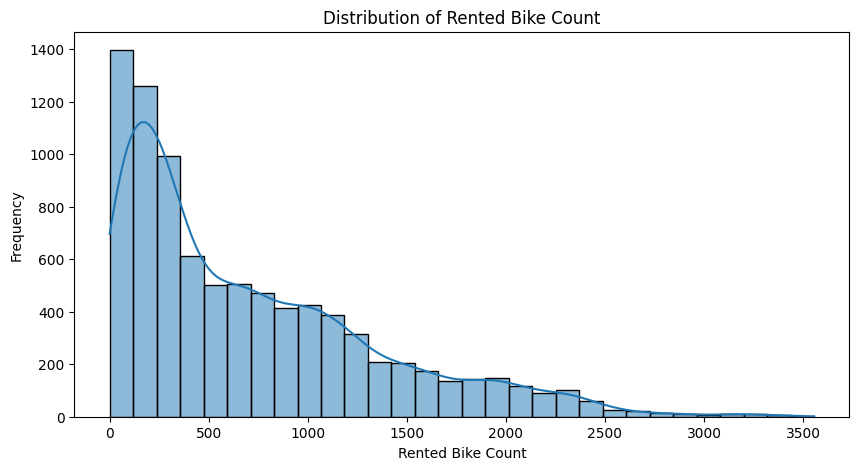

In [182]:
# Distribusi Rental Sepeda
plt.figure(figsize=(10, 5))
sns.histplot(df['Rented Bike Count'], bins=30, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

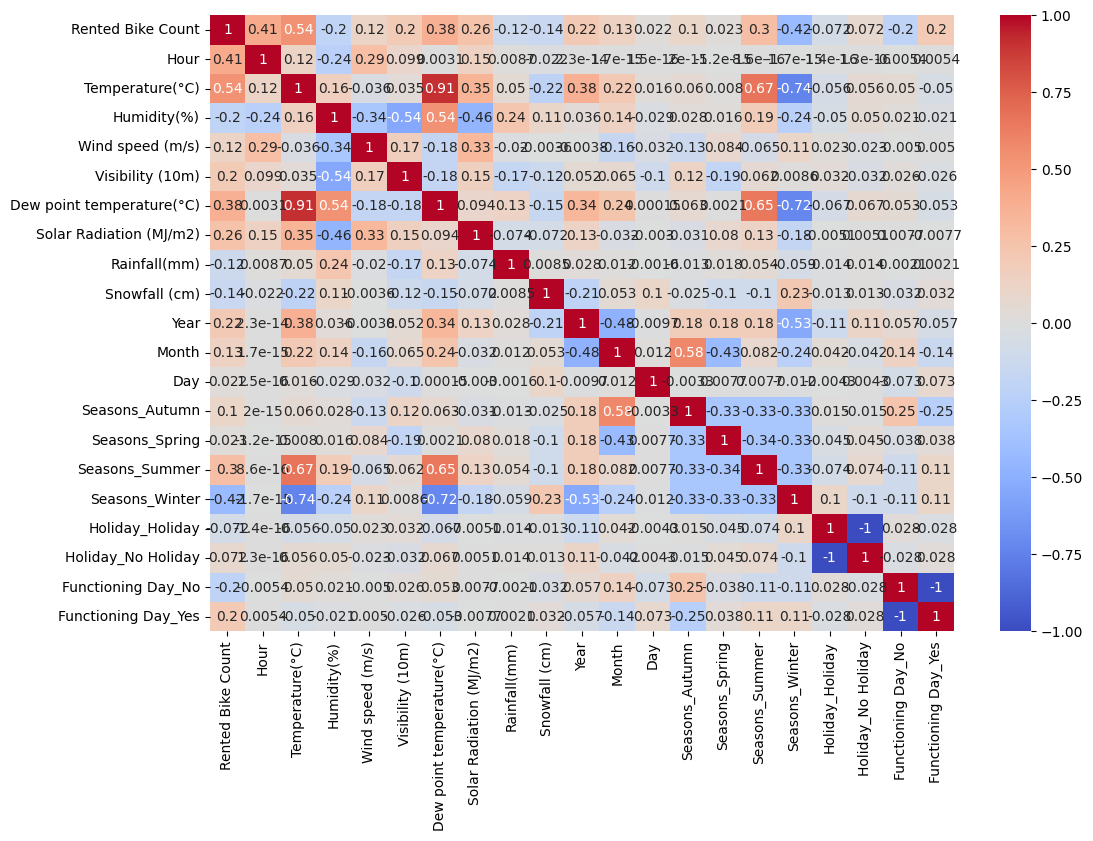

In [183]:
# Korelasi heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

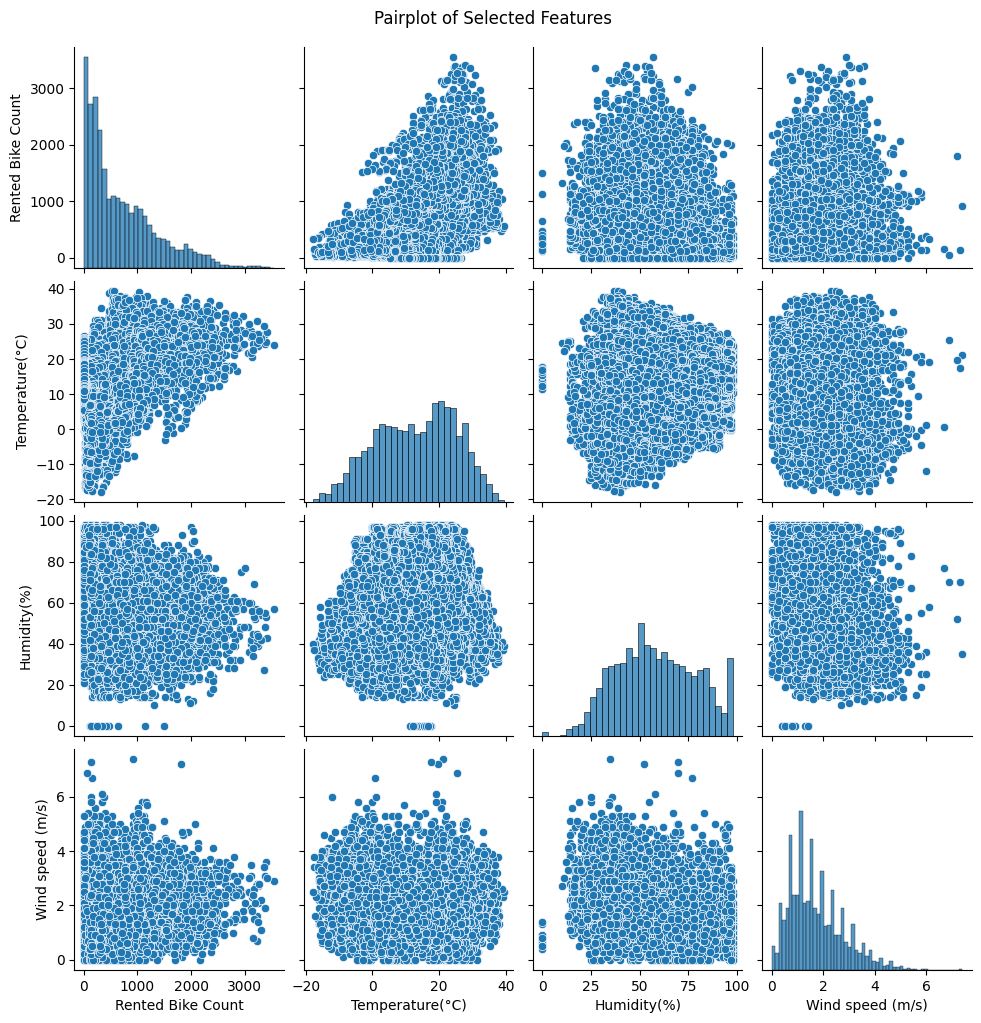

In [184]:
# Pairplot untuk memvisualkan hubungan antar fitur
sns.pairplot(df, vars=['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)'])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

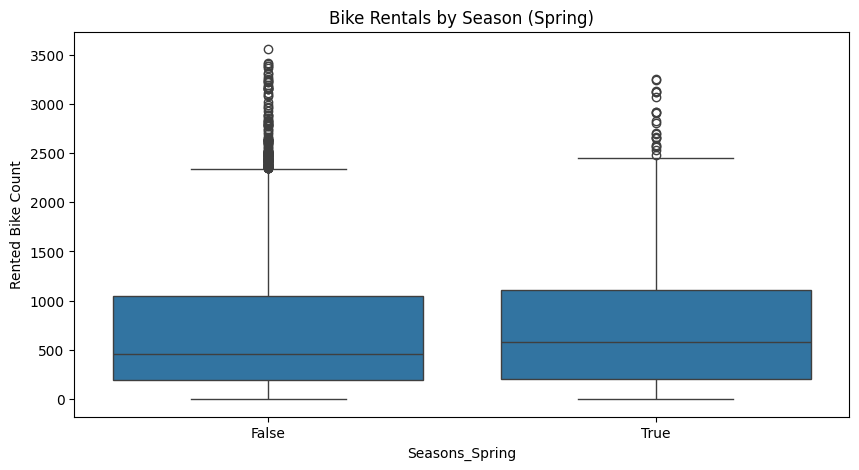

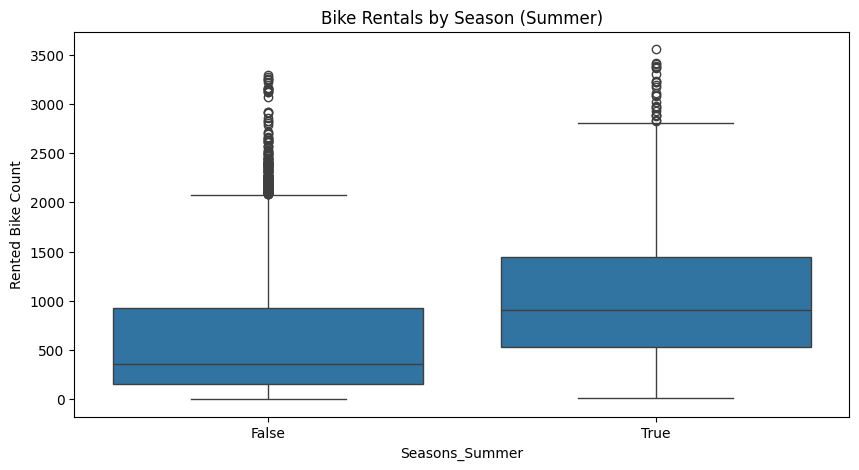

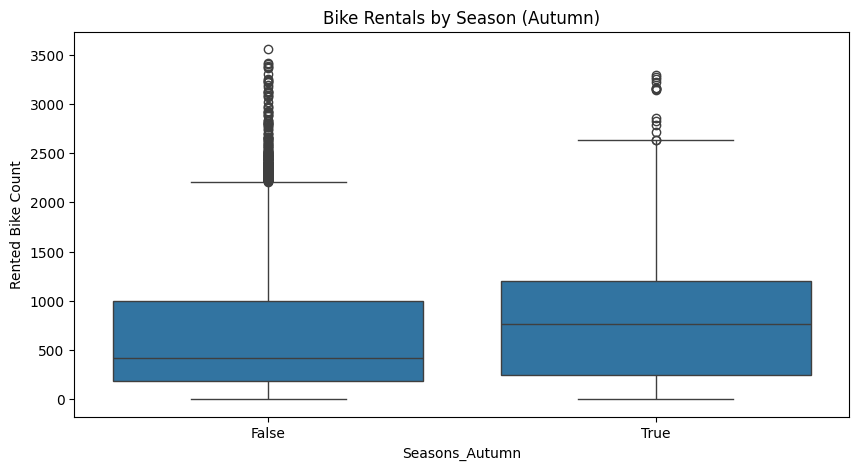

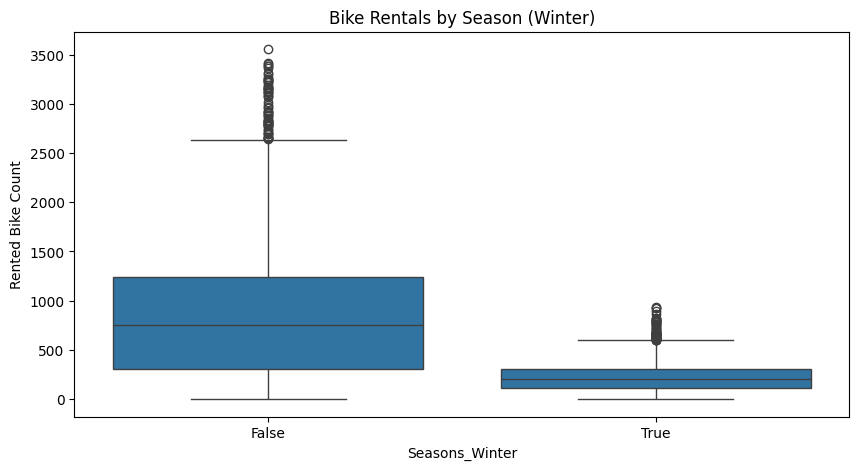

In [185]:
# Boxplot untuk setiap musim
plt.figure(figsize=(10, 5))
sns.boxplot(x='Seasons_Spring', y='Rented Bike Count', data=df)
plt.title('Bike Rentals by Season (Spring)')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Seasons_Summer', y='Rented Bike Count', data=df)
plt.title('Bike Rentals by Season (Summer)')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Seasons_Autumn', y='Rented Bike Count', data=df)
plt.title('Bike Rentals by Season (Autumn)')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Seasons_Winter', y='Rented Bike Count', data=df)
plt.title('Bike Rentals by Season (Winter)')
plt.show()

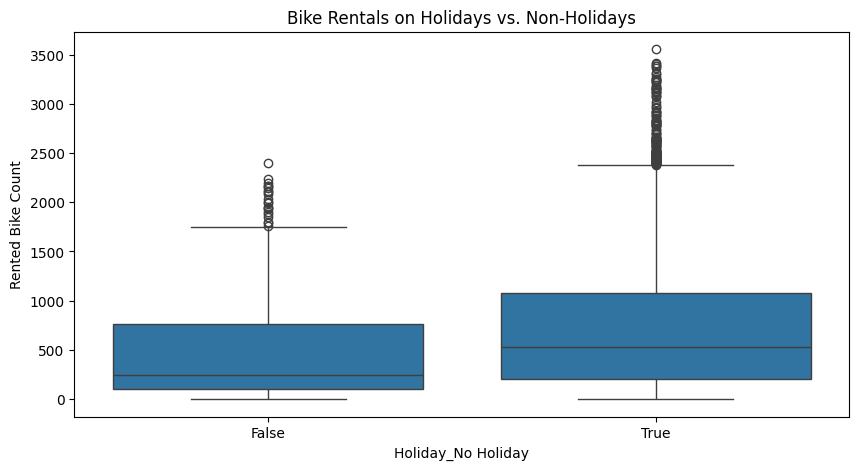

In [186]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Holiday_No Holiday', y='Rented Bike Count', data=df)
plt.title('Bike Rentals on Holidays vs. Non-Holidays')
plt.show()

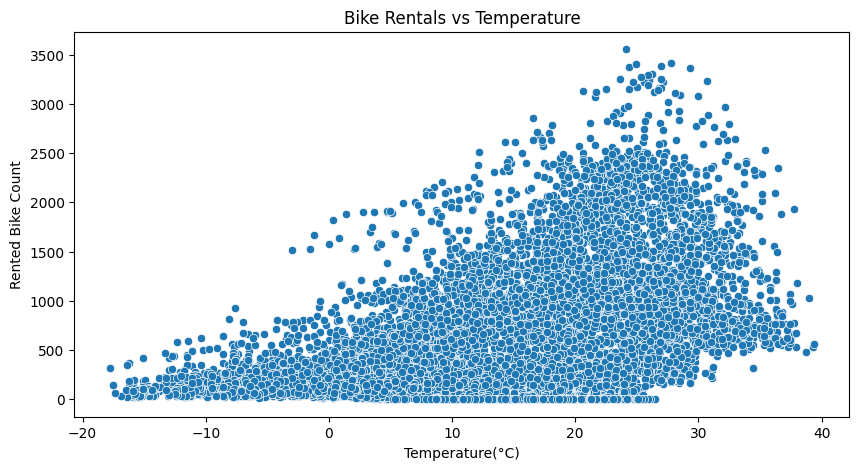

In [187]:
# Plot rental vs temperatur
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Bike Rentals vs Temperature')
plt.show()


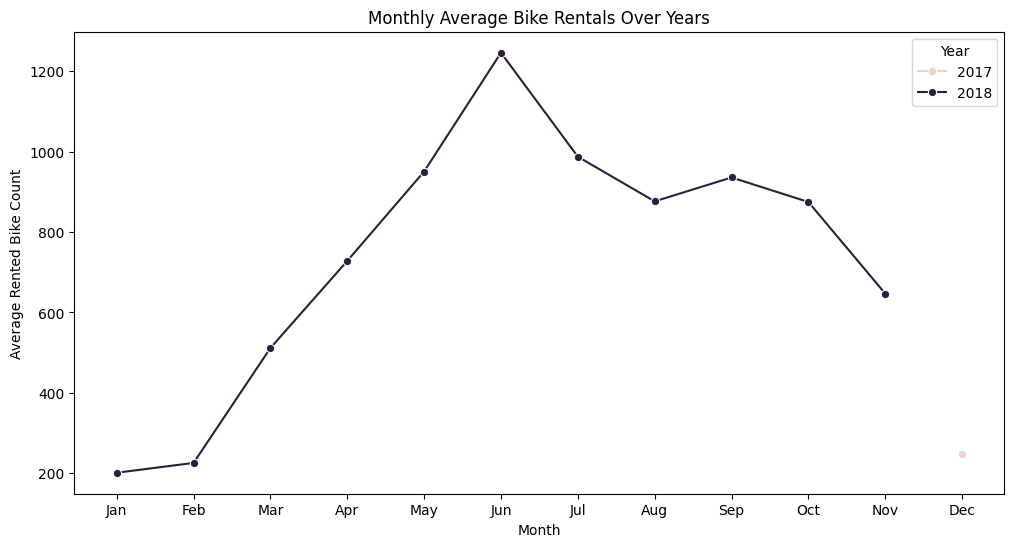

In [188]:
# Menganalisa tren rental
monthly_rentals = df.groupby(['Year', 'Month'])['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_rentals, x='Month', y='Rented Bike Count', hue='Year', marker='o')
plt.title('Monthly Average Bike Rentals Over Years')
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# 4. Menentukan Fitur dan Target

In [189]:
# Memilih fitur untuk prediksi
features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Spring', 'Seasons_Summer',
            'Seasons_Autumn', 'Holiday_No Holiday', 'Functioning Day_Yes']

# Variabel target
target = 'Rented Bike Count'

# 5. Memisah Data menjadi Train dan Test

In [190]:
X = df[features]
y = df[target]

# Memisah 8:2 Train dan Test, dengan random_state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standarisasi fitur

In [191]:
# Menstandarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Membuat model dengan Random Forest

In [192]:
# 7. Modeling dengan Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

# 8. Melakukan Prediksi

In [193]:
# 8. Membuat prediksi
y_pred = model.predict(X_test_scaled)

# 9. Melakukan Evaluasi

In [194]:
# 9. Mengevaluasi Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 144.44673515981734
R2 Score: 0.8629467904675058


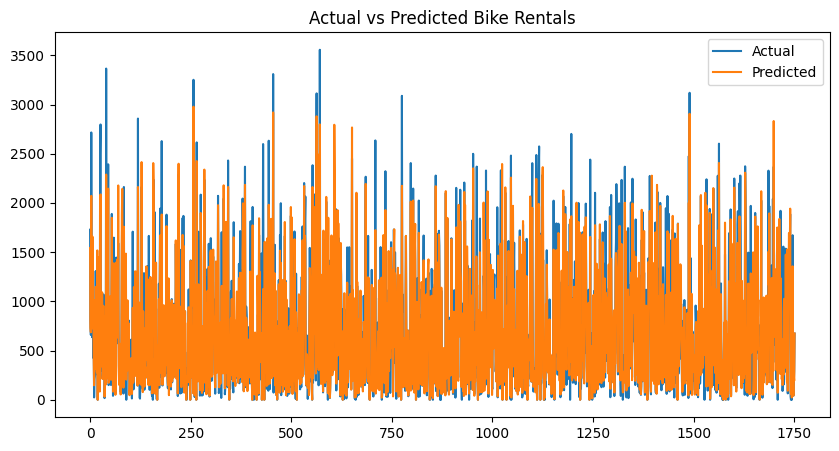

In [195]:
# Memvisualkan nilai prediksi vs asli
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Bike Rentals')
plt.show()